In [107]:
# Imports
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic plot conf
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['figure.figsize'] = (20,15)
sns.set_theme(style="whitegrid")

In [30]:
# Load the grains dataset
# Dataset description: https://archive.ics.uci.edu/ml/datasets/seeds#
grains = pd.read_csv('../input/seeds.csv', sep=',', header=None,
                names=['area','perimeter','compactness','lengthOfKernel',
                       'widthOfKernel','asymmetryCoefficient','lengthOfKernelGroove','seedType'])

# Print descriptive statistics
grains.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [39]:
# Print the correlation between features
grains.corr()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
lengthOfKernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
widthOfKernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetryCoefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
lengthOfKernelGroove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
seedType,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


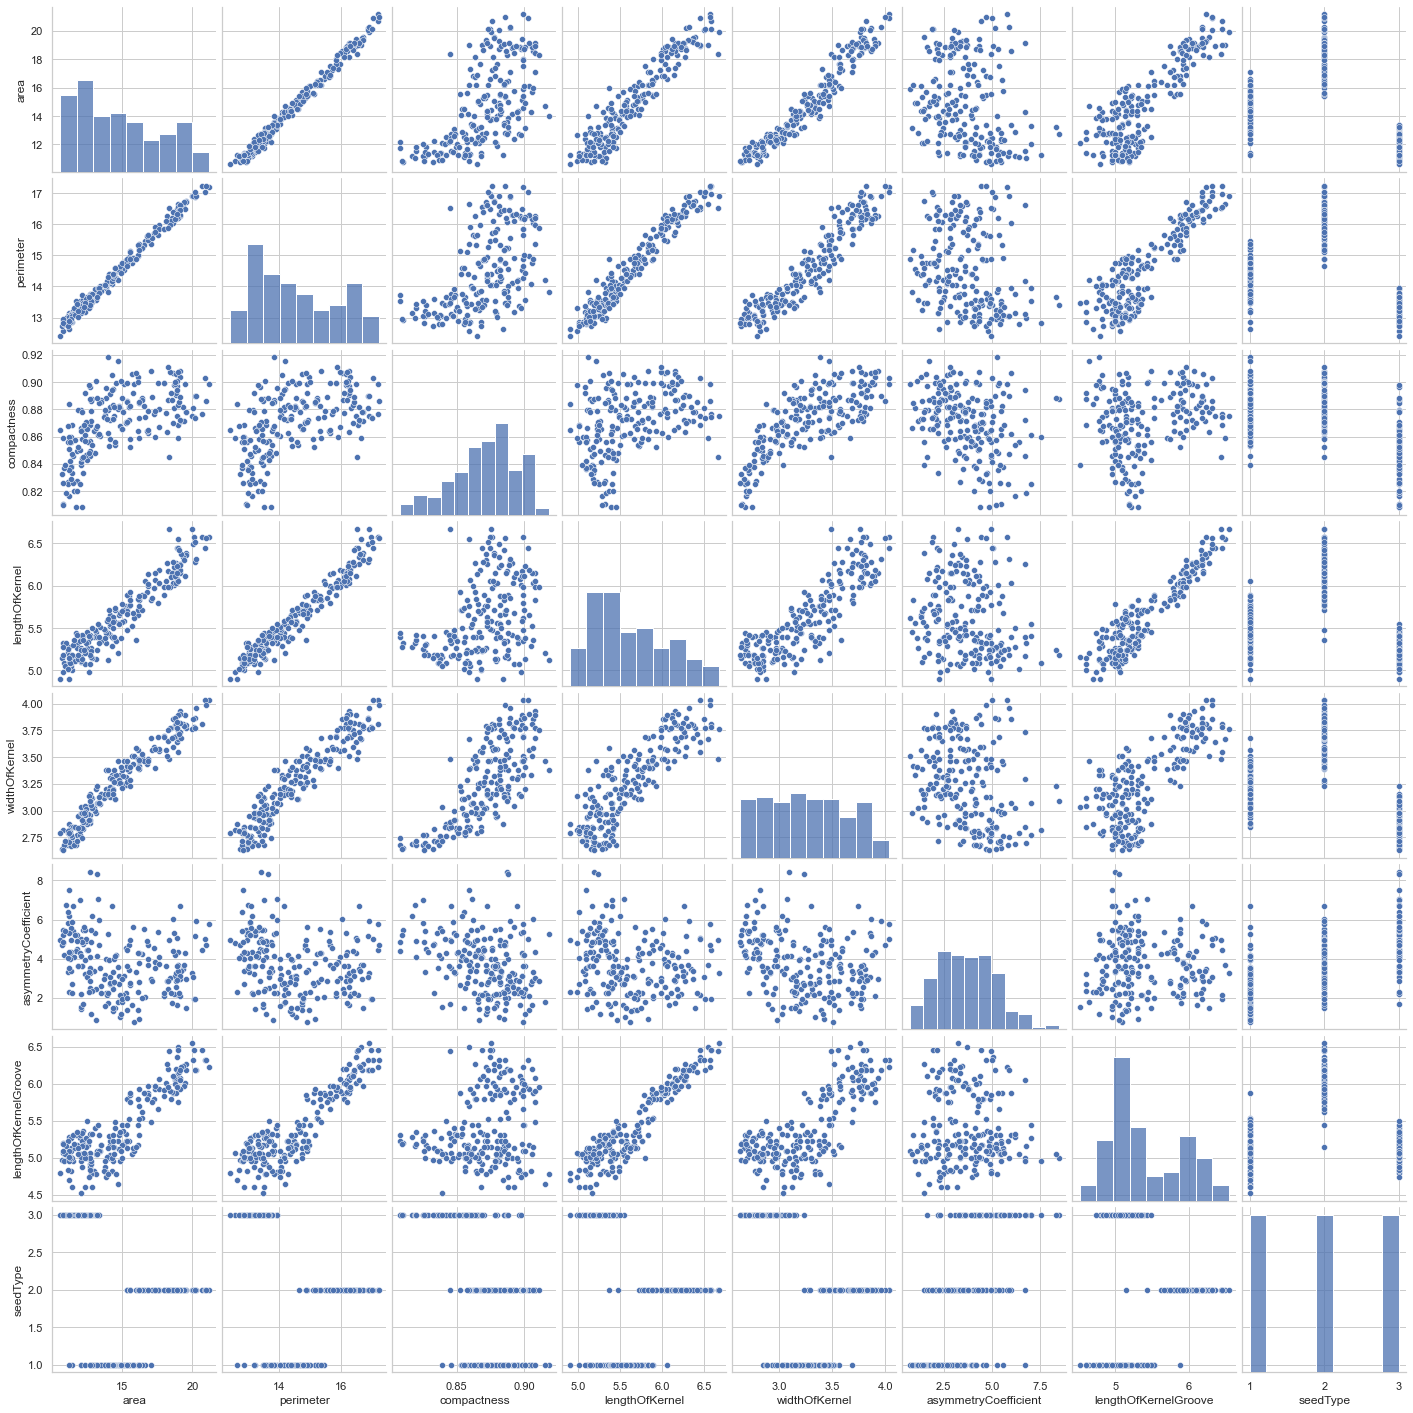

In [59]:
# Plot the correlation between features
sns.pairplot(grains)
plt.grid()
plt.show()

After printing the correlation table, we can clearly see multicollinearity. **PCA** can address this issue.
It will reduce the set of correlated features to a smaller, less correlated set (principal components). 

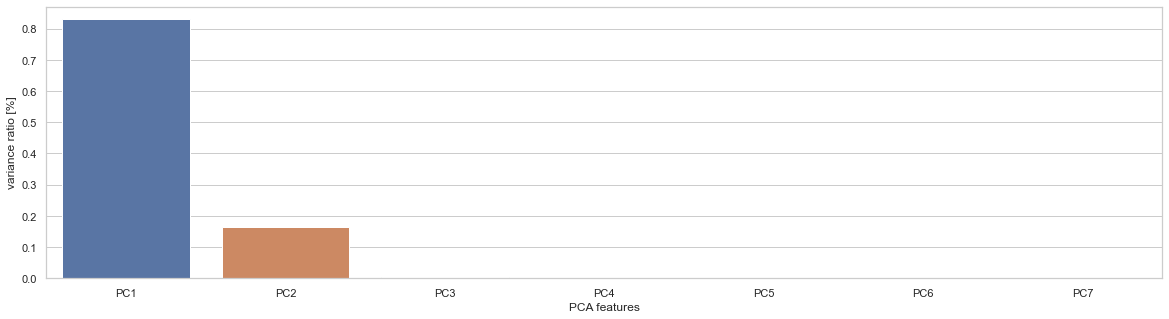

In [209]:
# Instantiate the model
model = PCA()
pca_features = model.fit_transform(grains.drop('seedType', axis=1))

# Princpal Components
df = pd.DataFrame({'var':model.explained_variance_ratio_,
             'PC':[f'PC{i}' for i in range(1, len(model.explained_variance_ratio_)+1)]})
plt.figure(figsize=(20,5))
sns.barplot(x='PC',y="var", 
           data=df)
plt.ylabel('variance ratio [%]')
plt.xlabel('PCA features')
plt.show()

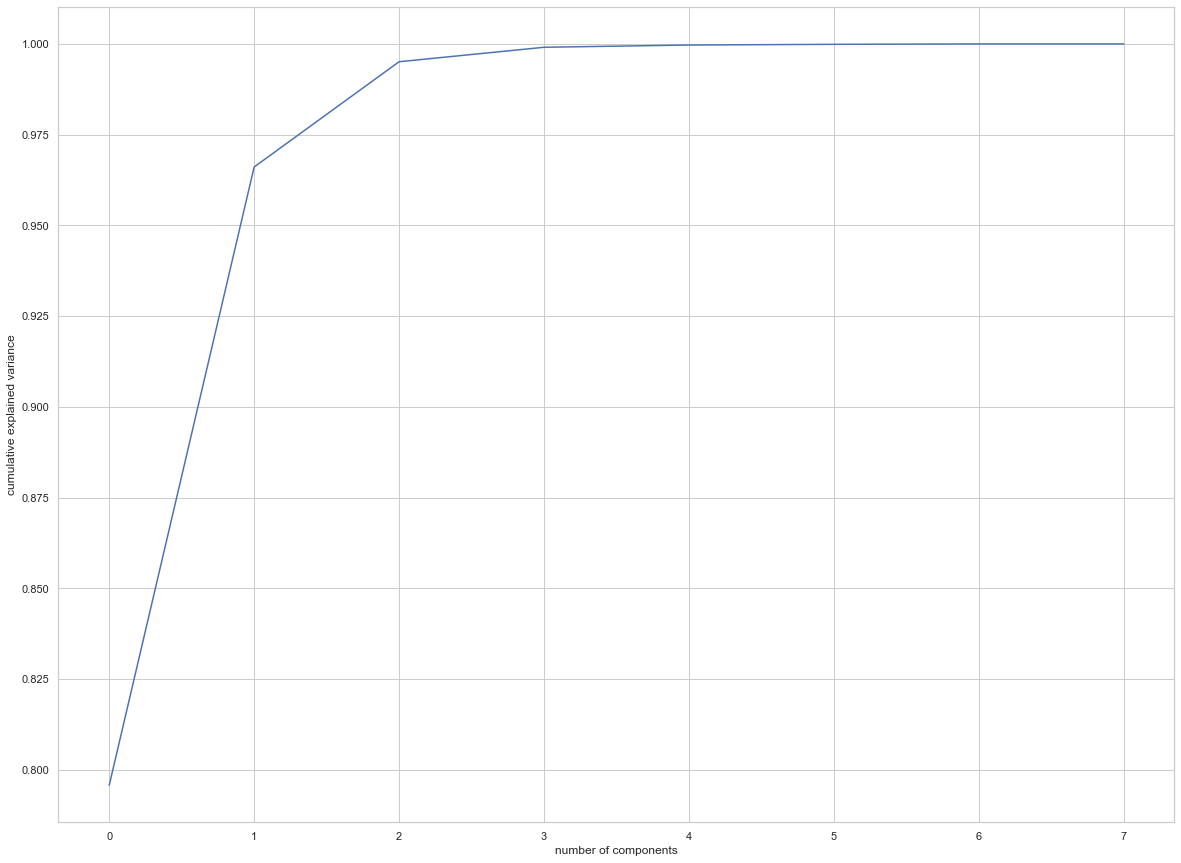

In [105]:
# Find the right number of dimensions
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Running PCA shows that the two first components (**PC1** & **PC2**) capture most of the variance of the dataset (>95%). So we can conclude that an **intrisinc dimension** of 2 is a reasonable choice.

In [202]:
# Features importance
pd.DataFrame(model.components_[:2],columns=grains.drop('seedType', axis=1).columns,index = ['PC-1','PC-2'])

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
PC-1,0.884229,0.395405,0.004311,0.128544,0.111059,-0.127616,0.128966
PC-2,0.100806,0.056490,-0.002895,0.030622,0.002372,0.989410,0.082233


c:\projects\clustering\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


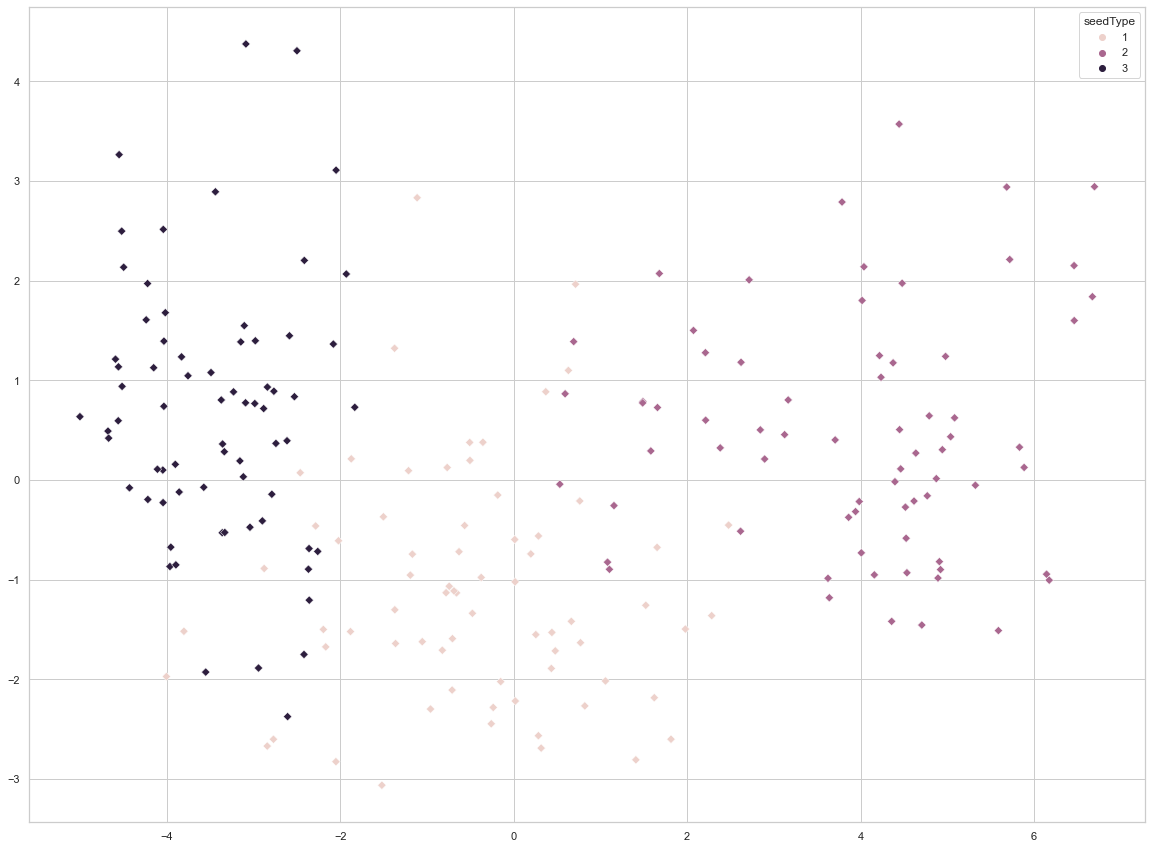

In [234]:
xs = pca_features[:,0]
ys = pca_features[:,1]

# Plot the results
sns.scatterplot(xs,ys, hue='seedType', marker='D', data=grains)
plt.show()

c:\projects\clustering\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


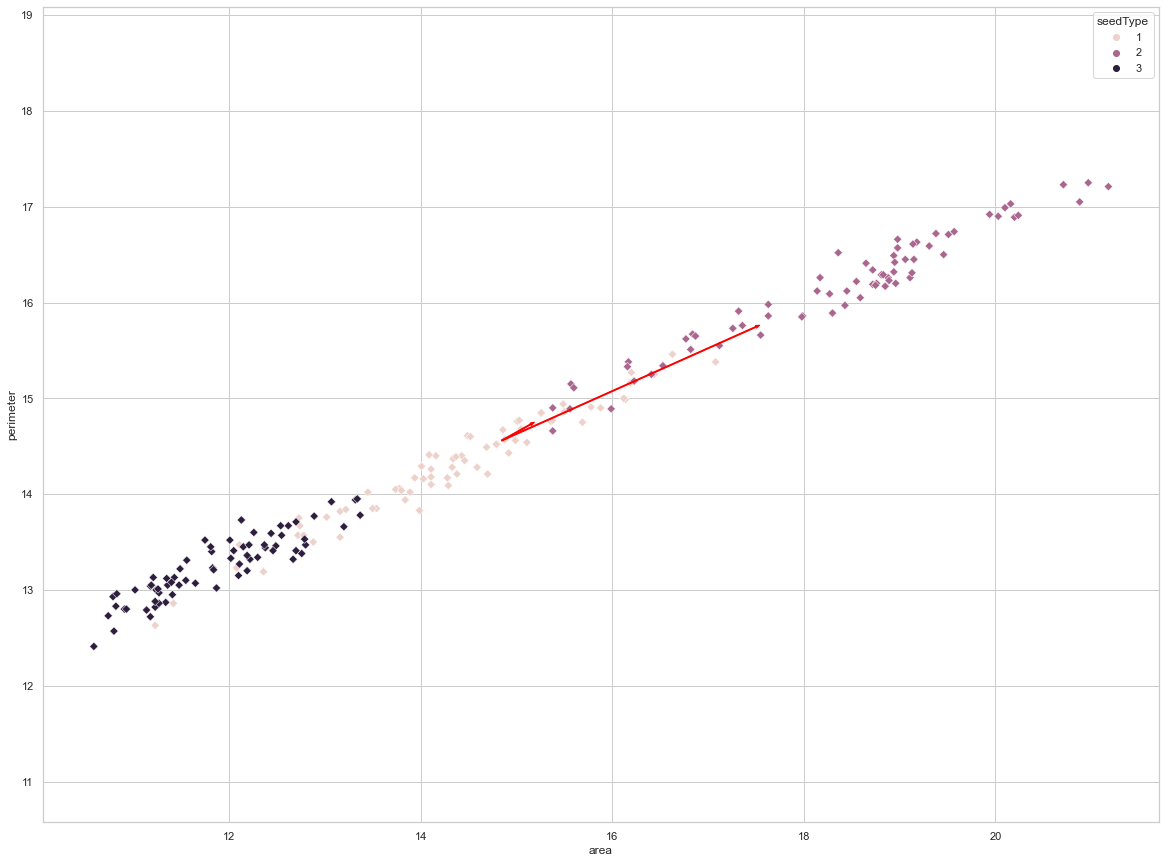

In [274]:
# Plot the vectors
# Get the mean of the grain samples: mean
mean = model.mean_

xs = pca_features[:,0]
ys = pca_features[:,1]

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

# Plot the results
plt.arrow(mean[0], mean[1], first_pc[0]*3, first_pc[1]*3, color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0]*3, second_pc[1]*3, color='red', width=0.01)
plt.axis('equal')
sns.scatterplot('area', 'perimeter', hue='seedType', marker='D', data=grains)
plt.show()

## Using a standardized dataset

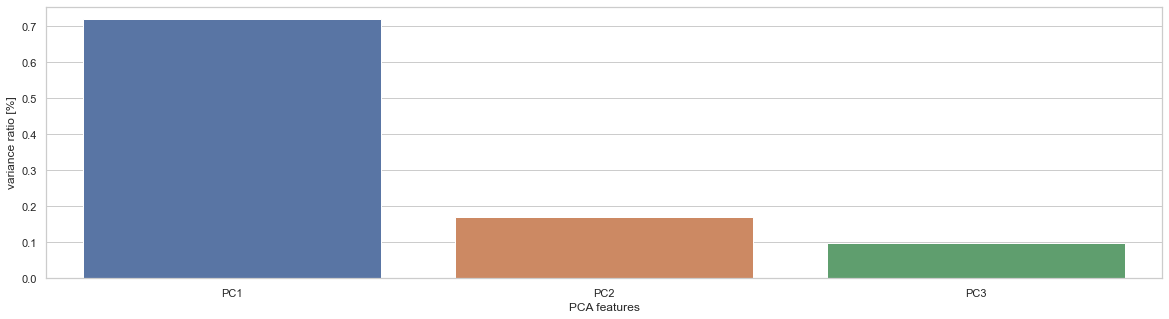

In [174]:
# Instantiate the steps
## Instantiate the StandardScaler
scaler = StandardScaler()
## Instantiate the PCA with n_components = 0.95 to get the minimum number of dimensions required 
## to preserve 95% of the dataset's variance
pca = PCA(n_components=0.95)

# Create the pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the model
features_scaled = pipeline.fit_transform(grains.drop('seedType', axis=1))

# Princpal Components
df_scaled = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':[f'PC{i}' for i in range(1, len(pca.explained_variance_ratio_)+1)]})
plt.figure(figsize=(20,5))
sns.barplot(x='PC',y="var", 
           data=df_scaled)
plt.ylabel('variance ratio [%]')
plt.xlabel('PCA features')
plt.show()

Now we have three components that capture the 95% variance of the dataset (**PC1**,**PC2** & **PC3**).

In [190]:
# Features importance
pd.DataFrame(pca.components_,columns=grains.drop('seedType', axis=1).columns,index = ['PC-1','PC-2', 'PC-3'])

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
PC-1,0.444474,0.441571,0.277017,0.423563,0.432819,-0.118692,0.387161
PC-2,-0.026564,-0.084003,0.529151,-0.205975,0.116690,-0.716882,-0.377193
PC-3,0.025871,-0.059839,0.629692,-0.211880,0.216483,0.679506,-0.213897


c:\projects\clustering\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


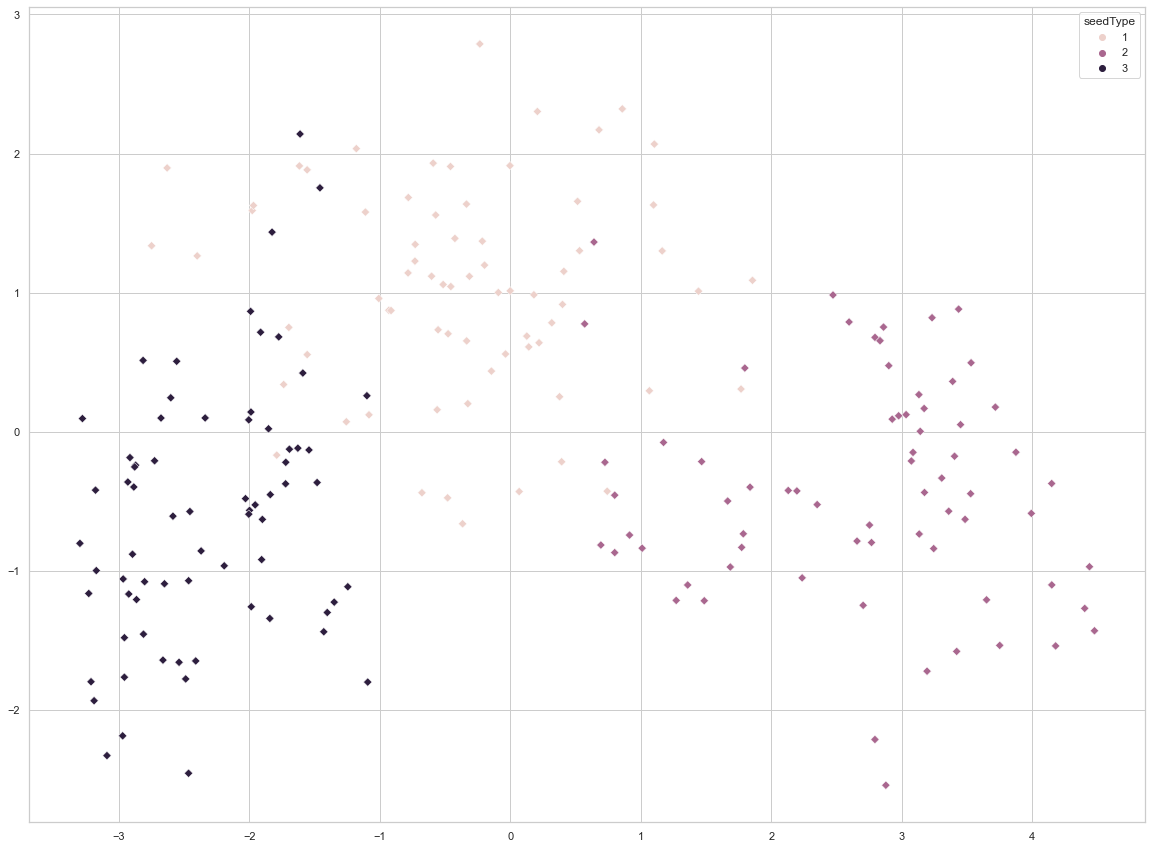

In [239]:
xs = features_scaled[:,0]
ys = features_scaled[:,1]

# Plot the results
sns.scatterplot(xs, ys, hue='seedType', marker='D', data=grains)
plt.show()